# What this file contains

-   Sinc^2 and Gaussian fit to sweep of frequencies
-   All plots from chapte 'Measurements from the B-field Detector'

# Homework by Wednesday

### homework for friday: analyze everything about ramsey

### questions


(Oct 14th) plot for how the rabi time was found -> file:134276 <- not sure about filenumber HE SENDS US

(Oct 14th) Should there be "static comp" because of note in overleaf to compare static comp 14th to 18th

(Oct 15th) Under which condition (static_comp,active_comp) was the data "oct_15_RabiFreqScanData.csv" measured

(Oct 18th) Did we take "no comp"? Because I made a note in overleaf

(Oct 18th) How do these numbers ((-5.000°, 5.100 V), (+245°, 5.1 V)) relate to "static_com_5_harmonics" and "okt_18_static_com_5_harmonics_B3_2_point_5"

(Oct 21st) get the data for the "damped oscillation", file number: 136587

(Oct 21st) static_comp_3 missing?


# guidelines

figures: every figure needs a caption and needs to be mentioned in the text.

every numbers needs a unit

content: 
- explain what we discussed in the first week


formatting numbers -> SIGNIFICANT FIGURES!!! 
t_D cannot be italic once and non italic once!!!

- Title: compensation of oscillating magnetic field noice 




# Wednesday talk



- "\Delta m=+-2 is due to the k vector and polarization and b field angle in our experiment"

- active 1: over 20 ms marker_size
- active 2: "fast" 1 data aquisition points
- static with active 1


files termed "static comp" have "normal averaging on"

I DONT UNDERSTAND WHY THE ACTIVE COMPENSATION ON
ACTIVE COMPENSATION NOT GOOD ENOUGH BECAUSE AVERAGING TAKES TIME, IN THAT TIME THE B FIELD CHANGES

"fast averaging" (only used for ramsey, )
    -   1 single data aquisition points: 2 us averaged 50 times -> 1 point of feeding back -> 100 us = 0.1 ms -> B field adjusted every 0.1 ms (important due to statistics)
    -   200 * 0.1 ms = 2 ms -> 200 fast averages are taken over 1 50 Hz period.

"normal averaging"
    -   HELL TELL Us

"Power broadening -decrease intensitiy of light given by the rabi amplitude"

-   analyze homework 04 -> what usage of the data makes sense. we went from left to right and then the second set from right to left
-   its important to explain in what time order the data was taken. IMPORTANT FOR ANALYSIS
-   mention that the gaps come in a hour! discuss!! 
-   justify usage of both datasets
-   compare fit parameters 

-   homework 04 discuss how many harmonics should be considered (2).

-   in homework 04 i took 2 data sets, for the second data set i redefined f0. i should do it like judith

-   error of f0 in gauss fit is 0.1 kHz



- have on plot with AI and AO when ACTIVE is OFF and ON. overlapping to explain how the active compensation works
- mention why the active compensation fails.



heartpeace <3
- split it into two datasets, see file numbers
- try to fit both datapieces (like judith) -> conclude if a fit makes sense or if i can conclude if its noice
- clearly describe the shape of the improvement. 
- he mentioned comparison of amplitudes, but this needs the improvement data to have an amplitude



undesrtanding the significance of the experiment
- decrease in fluctuation clearly visible
- in homework 04 
- The magnetic field might be tilted -> 



plot from heartpiece was made with data from Ca+ ion. the same should be done from the data from the b field measurement




4 modes of compensation:

(1) slow active -> measures for 20 ms, then applies for 20 ms and listens at the same time for 20 ms. the application of compensation always lags by 20 ms
(2) fast active (discussed before) 2us is the machines limit
(3) static (should be clear)
(4) keep B-field value (this is useless for compensation), useful for measuring what the b-field probe sees

from heartpiece we get \Delta kHz -> feed this into homework03 (BUT WITH OUR SETUP (E.G. ADJUST STATES)) to get how much the B field oscillates

problems with ramsey
- perhaps we did not start in S1/2 but S-1/2
- directional detuning -> small dip in blue data visible

why fast active performs better
- we did a good job with our fit to the Ca+ data -> argue why 50Hz and 150Hz harmonics are enough.
- Our fit also takes all noice into account (at that point in time)
- during the ramsey sequence the application of static comp tries to compensate "old noice"
- fast active compnsation takes all noice at that point in time into account


In [1]:
from plot_functions import *

In [2]:
# import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import math

In [3]:
# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [4]:
# # # funktionen

def plot_with_one_axis_twoY(data_x_1, data_y_1, data_x_2, data_y_2,  name_x, name_y, plot_title="title", filename_to_save="nopdf", line_style="", label1="nolabel", label2="nolabel", col1="#1f77b4", col2="#ff7f0e", marker_type="o", marker_size="5"):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data
    plt.plot(data_x_1, data_y_1, label=label1, marker=marker_type, linestyle=line_style, markersize=marker_size, color=col1) # color='red') 
    plt.plot(data_x_2, data_y_2, label=label2, color=col2, linestyle="-") #, marker='o', linestyle='') # color='red') 
    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()


### experimental setup

In [5]:
# experimental setup

number_of_repetitions = 60
frequency_list = np.linspace(73398200,73438200, 50)
num_OP_reps = 16

print("curse of action of the experiment")

# for repetition in range(number_of_repetitions):
#     for frequency in frequency_list:
#         cooling()

#         for _ in range(num_OP_reps):
#             optical_pumping_pulse_OP1()
#             _854pulse()
        
#         shelving_SH1_pulse(pi_time, frequency)
#         detection_fluorescence(750 us)

curse of action of the experiment


### Oct 15th

In [6]:
# load data

import pandas as pd
import numpy as np

# Lade die CSV-Datei
file_path = 'data/oct_15_RabiFreqScanData.csv'
data = pd.read_csv(file_path)

# Anzahl der Messpunkte pro Messung (50 Datenpunkte pro Messung)
n = 50

sweeps = len(data) / n

freq = data.frequency_Hz[:n]


# Extrahiere die 'discriminated_data'-Spalte
discriminated_data = data['discriminated_data'].values

print(type(discriminated_data))

# Initialisiere den Summenarray
summed_array = np.zeros(n)

# Iteriere über die Messungen in 50er-Schritten und addiere die Werte zu summed_array
for i in range(0, len(discriminated_data), n):
    measurement = discriminated_data[i:i+n]
    summed_array = np.add(summed_array, measurement)

# Das Ergebnis ist der summierte Array
# Normalisierung der Wahrscheinlichkeit
summed_array = summed_array / sweeps

# print(len(summed_array))

<class 'numpy.ndarray'>


In [7]:
# calculate y-error

N = 60

def error_func(y, N):
    return np.sqrt((y*(1-y)) / N)

error_bars = error_func(summed_array, N)

# print(error_bars)

In [8]:
# sinc² 

def sinc_square(x, a, c, d):
    return a* ((np.sin(d*(x-c)))/(d*(x-c)))**2 

a = 1
f_0 = 7.342 * 1e7
d = 0.0005
d = 0.0005

initial_guess = [a,f_0,d]

x_sinc = np.linspace(min(freq), max(freq), 1000)
y_sinc_guess = sinc_square(x_sinc, *initial_guess)

x_experiment = freq
y_experiment = summed_array

popt, pcov = curve_fit(sinc_square, x_experiment, y_experiment, p0=initial_guess)

a, f_0, d = popt
# fit parameters ± uncertainties
param_errors = np.sqrt(np.diag(pcov))
print(f"Fit-Parameter: a = {a:.4f} ± {param_errors[0]:.4f}, f_0 = {f_0:.4f} ± {param_errors[2]:.4e}, d = {d:.4f} ± {param_errors[2]:.4e}")

# R² value
y_fit = sinc_square(x_experiment, *popt)
y_mean = np.mean(y_experiment)
sst = np.sum((y_experiment - y_mean)**2) # Berechne die Sum of Squares Total (SST)
ssr = np.sum((y_experiment - y_fit)**2) # Berechne die Sum of Squares of Residuals (SSR)
r_squared = 1 - (ssr / sst) # Berechne R^2
print(f"R^2: {r_squared}")

Fit-Parameter: a = 0.8827 ± 0.0218, f_0 = 73419715.8085 ± 1.2233e-05, d = 0.0005 ± 1.2233e-05
R^2: 0.9714923357351684


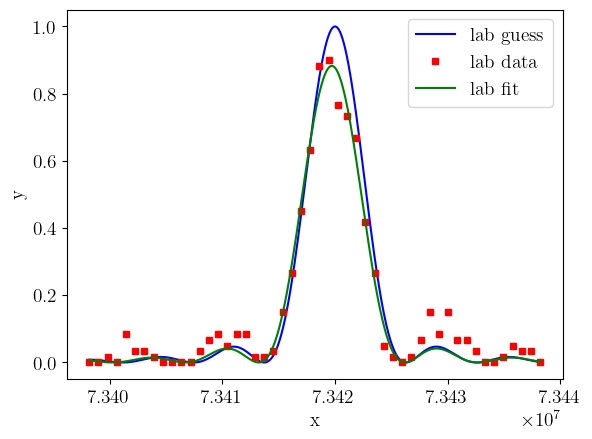

In [9]:
y_sinc_fit = sinc_square(x_sinc, *popt)

for_sinc = [
    [x_sinc, y_sinc_guess, "lab guess", "blue", "-", ""],
    [x_experiment, y_experiment, "lab data", "red", "", "s"],
    [x_sinc, y_sinc_fit, "lab fit", "green", "-", ""]
]

plot_with_one_axis(for_sinc, name_x="x", name_y="y", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=14, offset_text_size=14, legend_local="best", legend_size=14, x_ticks_limit=5)

In [10]:
# Guass fit

def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

x_data = freq
y_data = summed_array

initial_guess = [max(y_data), np.mean(x_data), np.std(x_data)]
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

a, x0, sigma = popt

# print(f"Fit-Parameter: a = {a}, x0 = {x0}, sigma = {sigma}")

x_fitted_g = np.linspace(min(x_data), max(x_data), 1000)
y_fitted_g = gaussian(x_fitted_g, *popt)

In [11]:
# fit parameters ± uncertainties

param_errors = np.sqrt(np.diag(pcov))
print(f"Fit-Parameter: a = {a:.4f} ± {param_errors[0]:.4f}, x0 = {x0:.4f} ± {param_errors[1]:.4e}, sigma = {sigma:.4f} ± {param_errors[2]:.4e}")

Fit-Parameter: a = 0.8975 ± 0.0304, x0 = 73419704.0190 ± 9.0973e+01, sigma = 2327.5101 ± 9.0973e+01


In [12]:
# R² value

y_fit = gaussian(x_data, *popt)
y_mean = np.mean(y_data)

sst = np.sum((y_data - y_mean)**2) # Berechne die Sum of Squares Total (SST)
ssr = np.sum((y_data - y_fit)**2) # Berechne die Sum of Squares of Residuals (SSR)
r_squared = 1 - (ssr / sst) # Berechne R^2

print(f"R^2: {r_squared}")

R^2: 0.9521852683123103


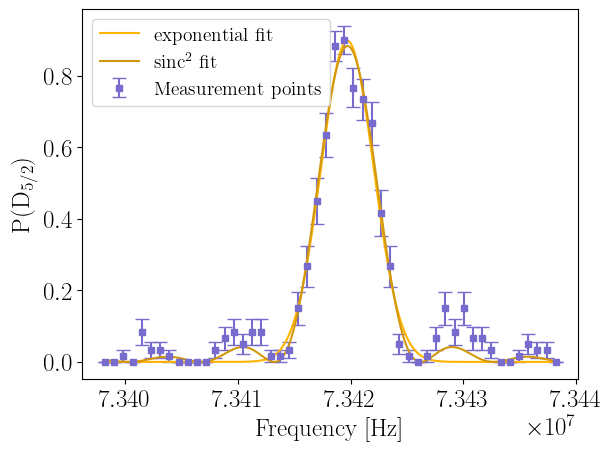

In [13]:
# Plot with fit (Gauss) with errors MENTION THAT THE DATA POINTS COME FROM GAUSSIAN FITS, DONE WITH NORMAL ACTIVE COMPENSATION


gausssss = [


    [x_fitted_g, y_fitted_g, r"exponential fit", c_scheme()[0]],
    
    [x_sinc, y_sinc_fit, r"sinc$^2$ fit", c_scheme()[1]], 




]

gausssss_err = [
    [freq, summed_array, error_bars, "Measurement points", c_scheme()[7], ""]
]

one_axis__N_Y_with_error_bars__with_N_fits(gausssss_err, gausssss, name_x="Frequency [Hz]", name_y=r"P(D$_{5/2})$", plot_title="", filename_to_save="python_figures/gauss_fit", marker_type="s", marker_size="5", capsize_errorbars=5, alpha_data=1.0, font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5)


# Different graphs of 
(yes active comp/ yes static comp)

(yes active comp/ no static comp)

(no active comp/ yes static comp)

(no active comp/ no static comp)

Delta: 0.0018299999999999983


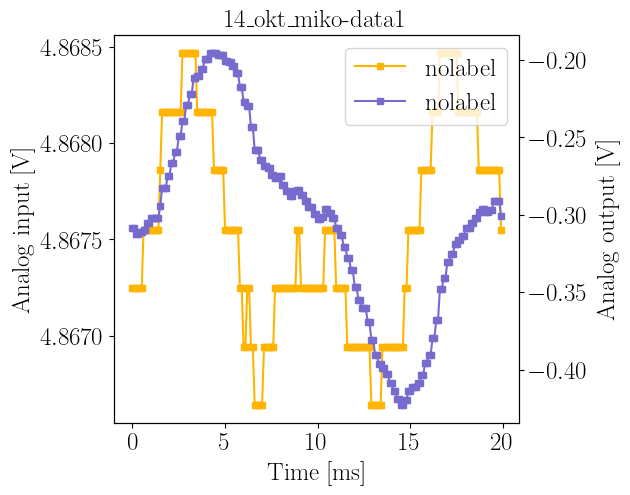

In [14]:
# okt 14th

file_okt_14_no_comp_1 = "data/Bfielddata_Students2024/14_okt_miko-data1.csv"
data_okt_14_no_comp_1 = pd.read_csv(file_okt_14_no_comp_1, sep="\t")

time_okt_14_no_comp_1 = data_okt_14_no_comp_1.analog_output
AI_okt_14_no_comp_1 = data_okt_14_no_comp_1.time_ms_2


OTHER_time_okt_14_no_comp_1 = data_okt_14_no_comp_1.analog_output
OTHER_AI_okt_14_no_comp_1 = data_okt_14_no_comp_1.time_ms_1

# plot

print(f"Delta: {max(AI_okt_14_no_comp_1)-min(AI_okt_14_no_comp_1)}")


# plot_with_one_axis([[time_okt_14_no_comp_1, AI_okt_14_no_comp_1, "nolabel", "#1f77b4", "-", "s"]], name_x="x", name_y="y", plot_title="title", filename_to_save="nosvg") # [data_x, data_y, label, colorr, line_style]

# plot_with_one_axis([[OTHER_time_okt_14_no_comp_1, OTHER_AI_okt_14_no_comp_1, "nolabel", "#1f77b4", "-", "s"]], name_x="x", name_y="y", plot_title="title", filename_to_save="nosvg") # [data_x, data_y, label, colorr, line_style]

# def plot_with_one_axis(list_of_data:list, name_x="x", name_y="y", plot_title="title", filename_to_save="nosvg", marker_size="5", font_size=14, offset_text_size=14, legend_local="best", legend_size=14, x_ticks_limit=5): # [data_x, data_y, label, colorr, line_style, marker_type]


plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_14_no_comp_1, AI_okt_14_no_comp_1, "nolabel", c_scheme()[0], "-", "s"]], [[OTHER_time_okt_14_no_comp_1, OTHER_AI_okt_14_no_comp_1, "nolabel", c_scheme()[7], "-", "s"]], "Time [ms]", "Analog input [V]", "Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="14_okt_miko-data1", filename_to_save="python_figures/14_okt_miko-data1", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)


### Okt 15th oct_15_active_comp_1

In [15]:
# read data

file_oct_15_active_comp_1_ = "data/Bfielddata_Students2024/okt_15_active_comp_1.csv"
data_oct_15_active_comp_1_ = pd.read_csv(file_oct_15_active_comp_1_, sep="\t")

time_oct_15_active_comp_1_ = data_oct_15_active_comp_1_.analog_output / 2
AI_oct_15_active_comp_1_ = data_oct_15_active_comp_1_.time_ms_2



OTHER_time_oct_15_active_comp_1_ = data_oct_15_active_comp_1_.analog_output / 2
OTHER_AI_oct_15_active_comp_1_ = data_oct_15_active_comp_1_.time_ms_1


In [16]:
# fit func four harmonics

def fitfunc(t, A, B1, B2, B3, B4, phi1, phi2, phi3, phi4, scale):
    B = [B1, B2, B3, B4]
    phi = [phi1, phi2, phi3, phi4]
    y = A
  

    for i in range(1, 5):
        # print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
        # y += B[i - 1] * np.cos(scale * (2*np.pi)*50*i*(t) + phi[i - 1])
        y += B[i - 1] * np.cos(scale *(2*np.pi)*i*(t) + phi[i - 1])

    return y

In [17]:
# get a good initial guess for "yes compensation"

ss = 15000

B = [2.329/ss, 0.067/ss, 10.046/ss, 0.038/ss]
phi = np.array([0,0,-np.pi,0])

phi = phi

A = 4.8675
scale = 1/40

initial_guess = [A, *B, *phi, scale]

# print(initial_guess)

fitted_x_YC = np.linspace(0,40,10000)
y_guess = fitfunc(fitted_x_YC, A, *B, *phi, scale)

In [18]:
# fit

boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc, time_oct_15_active_comp_1_, AI_oct_15_active_comp_1_, p0=initial_guess, bounds=boundaries)

fitted_y_YC = fitfunc(fitted_x_YC, *params)

# print("Fit parameters:")
# #fit_parameter_names = ["A",  "B1",   "B2",   "B3",   "B4", "phi1", "phi2", "phi3", "phi4", "xshift", "yshift"]
# fit_parameter_names = ["A",  "B1",   "B2",   "B3",   "B4", "phi1", "phi2", "phi3", "phi4", "scale"]
# for index, parameter in enumerate(params):
#     print(f"{fit_parameter_names[index]}: {parameter}")

max: 4.86847, min: 4.86664, delta: 0.0018299999999999983
1.8299999999999983 mG


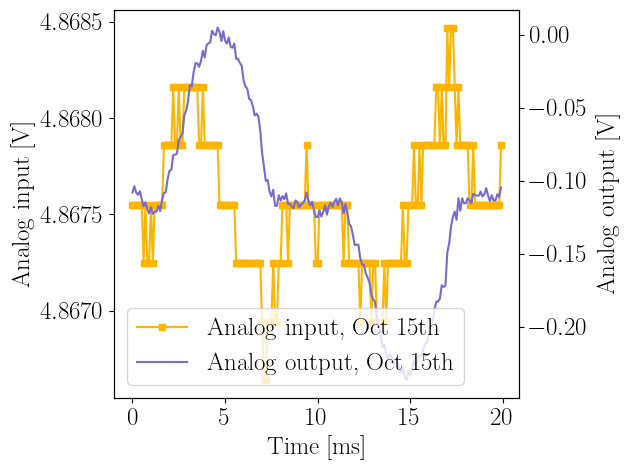

In [19]:
# plot

print(f"max: {max(AI_oct_15_active_comp_1_)}, min: {min(AI_oct_15_active_comp_1_)}, delta: {max(AI_oct_15_active_comp_1_) - min(AI_oct_15_active_comp_1_)}")

print(f"{(max(AI_oct_15_active_comp_1_) - min(AI_oct_15_active_comp_1_))*1e3} mG")


ai_nocomp15 = [
    [time_oct_15_active_comp_1_, AI_oct_15_active_comp_1_, "Analog input, Oct 15th", c_scheme()[0], "-", "s"], 
    # [fitted_x_YC, fitted_y_YC, "Analog input fit", c_scheme()[3], "-", ""]
]

ao_nocomp15 = [
    [OTHER_time_oct_15_active_comp_1_, OTHER_AI_oct_15_active_comp_1_, "Analog output, Oct 15th", c_scheme()[7], "-", ""]
]

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(ai_nocomp15, ao_nocomp15, "Time [ms]", "Analog input [V]", "Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_15_active_comp_1", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)





### Okt 15th oct_15_no_comp_1

In [20]:
# read data

file_oct_15_no_comp_1 = "data/oct_15_no_comp_1 (copy).csv"
data_oct_15_no_comp_1 = pd.read_csv(file_oct_15_no_comp_1, sep="\t")

time_oct_15_no_comp_1 = data_oct_15_no_comp_1.time_ms_1 / 2
AI_oct_15_no_comp_1 = data_oct_15_no_comp_1.analog_input

OTHER_time_oct_15_no_comp_1 = data_oct_15_no_comp_1.time_ms_1 / 2
OTHER_AI_oct_15_no_comp_1 = data_oct_15_no_comp_1.analog_output



In [21]:
# get a good initial guess for "no compensation"

ss = 2500

B = [2.329/ss, 0.067/ss, 1.046/ss, 0.038/ss]
phi = np.array([0,0,-np.pi,0])

phi = phi - 1.5

A = 4.868
scale = 1/40

initial_guess = [A, *B, *phi, scale]

x_guess = np.linspace(0,2*20,10000)
y_guess = fitfunc(x_guess, A, *B, *phi, scale)

In [22]:
# fit

boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc, time_oct_15_no_comp_1, AI_oct_15_no_comp_1, p0=initial_guess, bounds=boundaries)

fitted_y = fitfunc(x_guess, *params)

# print("Fit parameters:")
# #fit_parameter_names = ["A",  "B1",   "B2",   "B3",   "B4", "phi1", "phi2", "phi3", "phi4", "xshift", "yshift"]
# fit_parameter_names = ["A",  "B1",   "B2",   "B3",   "B4", "phi1", "phi2", "phi3", "phi4", "scale"]
# for index, parameter in enumerate(params):
#     print(f"{fit_parameter_names[index]}: {parameter}")



Delta: 0.003049999999999997


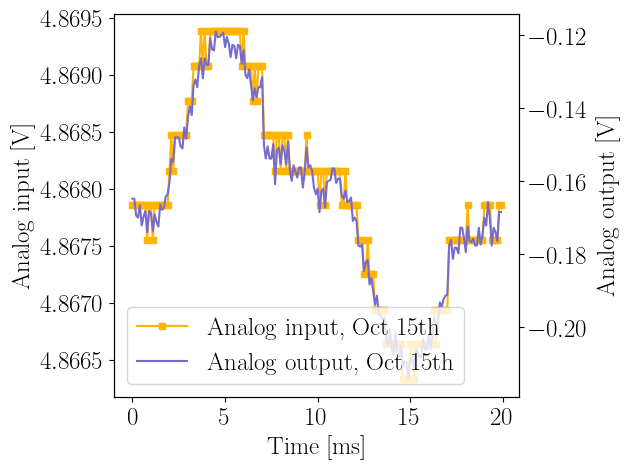

In [23]:
# plot

# plot_with_one_axis_twoY(time_oct_15_no_comp_1, AI_oct_15_no_comp_1, x_guess, fitted_y,  "name_x", "name_y", plot_title="oct_15_no_comp_1", filename_to_save="nopdf", line_style1="", line_style2="-", label1="nolabel", label2="fit", col1="dimgray", col2="black", marker_type="s", marker_size="3")



aaaa = [
    [time_oct_15_no_comp_1, AI_oct_15_no_comp_1, "Analog input, Oct 15th", c_scheme()[0], "-", "s"],
    # [x_guess, fitted_y, "Analog input fit", c_scheme()[3],  "-", ""]
]

bbbbb = [[OTHER_time_oct_15_no_comp_1, OTHER_AI_oct_15_no_comp_1, "Analog output, Oct 15th", c_scheme()[7], "-", ""]]

print(f"Delta: {max(AI_oct_15_no_comp_1)-min(AI_oct_15_no_comp_1)}")



plot_with_two_axes_with_N_curves_with_VERTICAL_lines(aaaa, bbbbb, "Time [ms]", "Analog input [V]", "Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/oct_15_no_comp_1", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)



In [24]:
# plot

# plot_with_one_axis_twoY(time_oct_15_no_comp_1, AI_oct_15_no_comp_1, x_guess, fitted_y,  "name_x", "name_y", plot_title="oct_15_no_comp_1", filename_to_save="nopdf", line_style1="", line_style2="-", label1="nolabel", label2="fit", col1="dimgray", col2="black", marker_type="s", marker_size="3")



aaaa = [
    [time_oct_15_no_comp_1, AI_oct_15_no_comp_1, "Analog input, NC", c_scheme()[0], "", "s"],
    [x_guess, fitted_y, "Analog input fit, NC", c_scheme()[0],  "-", ""]
]

bbbbb = [[OTHER_time_oct_15_no_comp_1, OTHER_AI_oct_15_no_comp_1, "Analog output", c_scheme()[0], "-", ""]]

print(f"Delta: {max(AI_oct_15_no_comp_1)-min(AI_oct_15_no_comp_1)}")



# plot_with_one_axis(aaaa, name_x="Time [ms]", name_y="Analog input [V]", plot_title="", filename_to_save="python_figures/bfield_nocomp", marker_size="5", font_size=18, offset_text_size=18, legend_local="best", legend_size=18, x_ticks_limit=5)



Delta: 0.003049999999999997


### 18 Okt static comp 1

In [25]:


file_okt_18_static_com_1 = "data/Bfielddata_Students2024/okt_18_static_com_1.csv"
data_18_okt_static_com_1 = pd.read_csv(file_okt_18_static_com_1, sep="\t")

time_okt_18_static_com_1 = data_18_okt_static_com_1.analog_output
AI_okt_18_static_com_1 = data_18_okt_static_com_1.time_ms_2

OTHER_time_okt_18_static_com_1 = data_18_okt_static_com_1.analog_output
OTHER_AI_okt_18_static_com_1 = data_18_okt_static_com_1.time_ms_1

Delta: 0.0012199999999999989


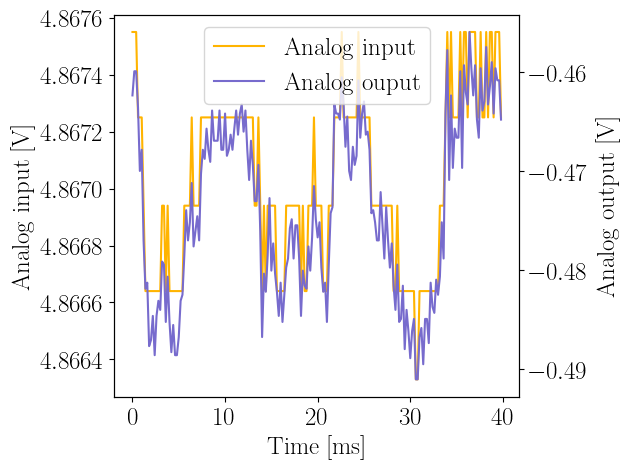

In [26]:
# plot

# plot_with_one_axis(time_okt_18_static_com_1, AI_okt_18_static_com_1, "name_x", "name_y", plot_title="18 Okt (27°, 5.1V, 50Hz) static comp 2", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5")

print(f"Delta: {max(AI_okt_18_static_com_1)-min(AI_okt_18_static_com_1)}")

# plot_with_one_axis([[time_okt_18_static_com_1, AI_okt_18_static_com_1, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="18 Okt (27°, 5.1V, 50Hz) static comp 2", filename_to_save="nopdf", marker_size="5")



plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_18_static_com_1, AI_okt_18_static_com_1, "Analog input", c_scheme()[0], "-", ""]], [[OTHER_time_okt_18_static_com_1, OTHER_AI_okt_18_static_com_1, "Analog ouput", c_scheme()[7], "-", ""]], name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_18_static_com_1", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)

# time_okt_18_static_com_1 = data_18_okt_static_com_1.analog_output
# AI_okt_18_static_com_1 = data_18_okt_static_com_1.time_ms_2

# OTHER_time_okt_18_static_com_1 = data_18_okt_static_com_1.analog_output
# OTHER_AI_okt_18_static_com_1 = data_18_okt_static_com_1.time_ms_1


### Okt 18th no comp 2

In [27]:
# read data

file_okt_18_no_comp_2 = "data/Bfielddata_Students2024/okt_18_no_comp_2.csv"
data_18_okt_no_comp_2 = pd.read_csv(file_okt_18_no_comp_2, sep="\t")

time_okt_18_no_comp_2 = data_18_okt_no_comp_2.analog_output
AI_okt_18_no_comp_2 = data_18_okt_no_comp_2.time_ms_2

OTHER_time_okt_18_no_comp_2 = data_18_okt_no_comp_2.analog_output
OTHER_AI_okt_18_no_comp_2 = data_18_okt_no_comp_2.time_ms_1



Delta: 0.003049999999999997


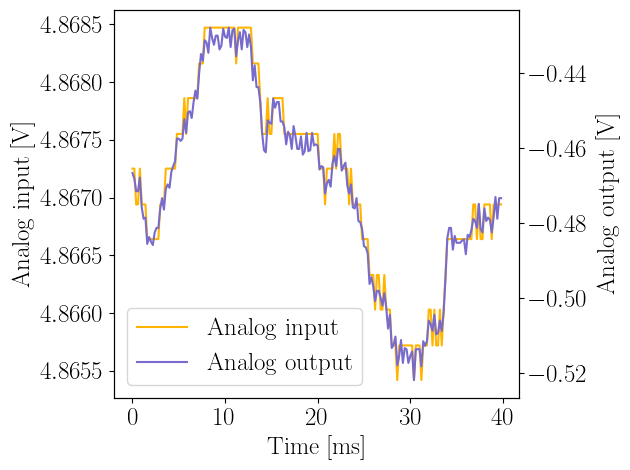

In [28]:
# plot

# plot_with_one_axis(time_okt_18_no_comp_2, AI_okt_18_no_comp_2, "name_x", "name_y", plot_title="AI_okt_18_no_comp_2, -41°, 5.8V, 49.8 Hz", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5")

print(f"Delta: {max(AI_okt_18_no_comp_2)-min(AI_okt_18_no_comp_2)}")

# plot_with_one_axis([[time_okt_18_no_comp_2, AI_okt_18_no_comp_2, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="AI_okt_18_no_comp_2, -41°, 5.8V, 49.8 Hz", filename_to_save="nopdf", marker_size=5)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_18_no_comp_2, AI_okt_18_no_comp_2, "Analog input", c_scheme()[0], "-", ""]], [[OTHER_time_okt_18_no_comp_2, OTHER_AI_okt_18_no_comp_2, "Analog output", c_scheme()[7], "-", ""]], name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_18_no_comp_2", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)


# OTHER_time_okt_18_no_comp_2 = data_18_okt_no_comp_2.analog_output
# OTHER_AI_okt_18_no_comp_2 = data_18_okt_no_comp_2.time_ms_1




### comparison of magnetic fluctuation of oct 15th oct 18th

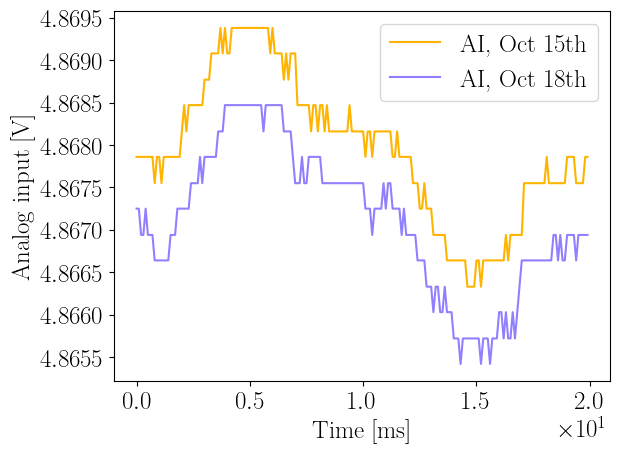

In [29]:
oct15_vs_oct18 = [
    [time_oct_15_no_comp_1, AI_oct_15_no_comp_1, "AI, Oct 15th", c_scheme()[0], "-", ""],
    # [x_guess, fitted_y, "Analog input fit", c_scheme()[3],  "-", ""]

    [time_okt_18_no_comp_2/2, AI_okt_18_no_comp_2, "AI, Oct 18th", c_scheme()[8], "-", ""],
]

# plot_with_one_axis(oct15_vs_oct18, name_x="x", name_y="y", plot_title="title", filename_to_save="nosvg", marker_size="5", font_size=14, offset_text_size=14, legend_local="best", legend_size=14, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]

plot_with_one_axis(oct15_vs_oct18, name_x="Time [ms]", name_y="Analog input [V]", plot_title="", filename_to_save="nosvg", marker_size="5", font_size=18, offset_text_size=18, legend_local="best", legend_size=18, x_ticks_limit=5)


### 21. Okt okt_21_static_comp_monday_optimized_the_setup

In [30]:
# read data

file_okt_21_static_comp_monday_optimized_the_setup = "data/Bfielddata_Students2024/okt_21_static_comp_monday_optimized_the_setup.csv"
data_okt_21_static_comp_monday_optimized_the_setup = pd.read_csv(file_okt_21_static_comp_monday_optimized_the_setup, sep="\t")

time_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.analog_output / 2
AI_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.time_ms_2

OTHER_time_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.analog_output / 2
OTHER_AI_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.time_ms_1



### static_com_2 and no_comp_2

In [31]:
# read data

file_okt_18_static_comp_2 = "data/Bfielddata_Students2024/okt_18_static_comp2.csv"
data_18_okt_static_comp_2 = pd.read_csv(file_okt_18_static_comp_2, sep="\t")

time_okt_18_static_comp_2 = data_18_okt_static_comp_2.time_ms_1 / 2
AI_okt_18_static_comp_2 = data_18_okt_static_comp_2.analog_input

OTHER_time_okt_18_static_comp_2 = data_18_okt_static_comp_2.time_ms_1 / 2
OTHER_AI_okt_18_static_comp_2 = data_18_okt_static_comp_2.analog_output




In [32]:
# fit
def fitfunc(t, A, B1, B2, B3, B4, phi1, phi2, phi3, phi4, scale):
    B = [B1, B2, B3, B4]
    phi = [phi1, phi2, phi3, phi4]
    y = A
  

    for i in range(1, 5):
        # print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
        # y += B[i - 1] * np.cos(scale * (2*np.pi)*50*i*(t) + phi[i - 1])
        y += B[i - 1] * np.cos(scale *(2*np.pi)*i*(t) + phi[i - 1])

    return y

In [33]:
time_okt_18_no_comp_2_judith = time_okt_18_no_comp_2*1e-3 / 2
AI_okt_18_no_comp_2_judith = AI_okt_18_no_comp_2

time_okt_18_static_comp_2_judith = data_18_okt_static_comp_2.time_ms_1*1e-3 / 2
AI_okt_18_static_comp_2_judith = data_18_okt_static_comp_2.analog_input

try_fit_time_okt_21_static_comp_monday_optimized_the_setup = time_okt_21_static_comp_monday_optimized_the_setup
try_fit_AI_okt_21_static_comp_monday_optimized_the_setup = AI_okt_21_static_comp_monday_optimized_the_setup




In [34]:
# get a good initial guess for "no_comp_2"

# fit_two_harmonics 

ss = 15000
B = [2.329/ss, 0.067/ss, 10.046/ss, 0.038/ss]
phi = np.array([0,0,-np.pi,0])
phi = phi
A = 4.8675
scale = 1/(40*1e-3)
initial_guess = [A, *B, *phi, scale]
# print(initial_guess)
fitted_x_YC = np.linspace(0,20*1e-3,10000)
y_guess = fitfunc(fitted_x_YC, A, *B, *phi, scale)
boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc, time_okt_18_no_comp_2_judith, AI_okt_18_no_comp_2_judith, p0=initial_guess, bounds=boundaries)
fitted_y_YC_oct18 = fitfunc(fitted_x_YC, *params)

params

array([ 4.86795822e+00,  1.78489701e-03,  1.34246243e-03,  9.79735673e-04,
        7.48383877e-04,  4.84376179e-01, -4.10471037e+00, -3.75551267e+00,
       -9.27385921e+00,  3.24295579e+01])

In [35]:
# get a good initial guess for "yes_comp_2"

ss = 15000
B = [2.329/ss, 0.067/ss, 10.046/ss, 0.038/ss]
phi = np.array([0,0,-np.pi,0])
phi = phi
A = 4.8675
scale = 1/(40*1e-3)
initial_guess = [A, *B, *phi, scale]
# print(initial_guess)
fitted_x_YC = np.linspace(0,20*1e-3,10000)
y_guess_YESCOMP = fitfunc(fitted_x_YC, A, *B, *phi, scale)
boundaries=([-1,0,0,0,0,10*-np.pi,10*-np.pi,10*-np.pi,10*-np.pi,1e-12],[10,10,10,10,10, np.pi,np.pi,2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc, time_okt_18_static_comp_2_judith, AI_okt_18_static_comp_2_judith, p0=initial_guess, bounds=boundaries)
fitted_y_YC_YESCOMP = fitfunc(fitted_x_YC, *params)

In [36]:
# get a good initial guess for "21st comp"
def fitfunc21(t, A, B1, B3, phi1, phi3, scale):
    B = [B1, B3]
    phi = [phi1, phi3]
    y = A
  

    for i in range(1, 3):
        # print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
        # y += B[i - 1] * np.cos(scale * (2*np.pi)*50*i*(t) + phi[i - 1])
        y += B[i - 1] * np.cos(scale *(2*np.pi)*i*(t) + phi[i - 1])

    return y

# ss = 3000
# B = np.array([0.1, 0.7]) / (ss)
# phi = np.array([0, -0.5*np.pi])
# phi = phi
# A = 4.8664
# scale = 1/(12*1e-3)
# initial_guess = [A, *B, *phi, scale]
# initial_guess = [-3.84243051e-01,  3.87998332e-03,  5.06143162e-03, -1.78296558e+00, -4.11160888e+00, 7.39757727e-02]


A = 4.8665
B = np.array([3.87989661e-03, -5.06153943e-03]) / 20
phi = [-1.78309919e+00, -9.70292655e-01]
scale = 7.39774427e+01
initial_guess = [A, *B,  *phi, scale]  

fitted_x_YC = np.linspace(min(time_okt_21_static_comp_monday_optimized_the_setup*1e-3),max(time_okt_21_static_comp_monday_optimized_the_setup*1e-3),10000)
y_guess_COMP21 = fitfunc21(fitted_x_YC, *initial_guess)

boundaries=([-1,0,0,10*-np.pi,10*-np.pi,1e-12],[10,10,10, 2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc21, time_okt_21_static_comp_monday_optimized_the_setup, AI_okt_21_static_comp_monday_optimized_the_setup, p0=initial_guess) #, bounds=boundaries)
fitted_y_YC_COMP21 = fitfunc21(fitted_x_YC, *params)





max: 4867.25, min: 4866.030000000001, diff: 1.2199999999999989 mG
max: 4868.47, min: 4865.42, diff: 3.049999999999997 mG


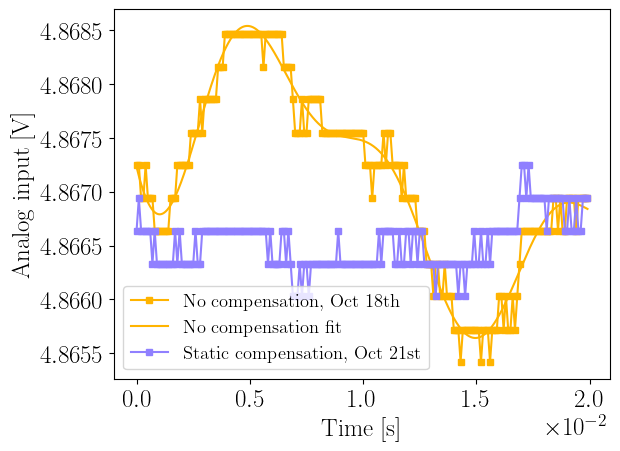

In [37]:
like_judith = [
    [time_okt_18_no_comp_2_judith, AI_okt_18_no_comp_2_judith, "No compensation, Oct 18th", c_scheme()[0], "-", "s"],
    [fitted_x_YC, fitted_y_YC_oct18, "No compensation fit", c_scheme()[0],  "-", ""],


    [time_okt_21_static_comp_monday_optimized_the_setup*1e-3, AI_okt_21_static_comp_monday_optimized_the_setup, "Static compensation, Oct 21st", c_scheme()[8],  "-", "s"],

    # [fitted_x_YC, y_guess, "GUESS", c_scheme()[4],  "-", ""],
    # [fitted_x_YC, y_guess_COMP21, "and?", c_scheme()[4],  "-", ""],

    # [fitted_x_YC, fitted_y_YC_COMP21, "Static compensation fit", c_scheme()[8],  "-", ""],

]

print(f"max: {max(AI_okt_21_static_comp_monday_optimized_the_setup)*1e3}, min: {min(AI_okt_21_static_comp_monday_optimized_the_setup)*1e3}, diff: {(max(AI_okt_21_static_comp_monday_optimized_the_setup) - min(AI_okt_21_static_comp_monday_optimized_the_setup))*1e3} mG")

print(f"max: {max(AI_okt_18_no_comp_2_judith)*1e3}, min: {min(AI_okt_18_no_comp_2_judith)*1e3}, diff: {(max(AI_okt_18_no_comp_2_judith) - min(AI_okt_18_no_comp_2_judith))*1e3} mG")


plot_with_one_axis(like_judith, name_x="Time [s]", name_y="Analog input [V]", plot_title="", filename_to_save="python_figures/heart_piece_from_BFIELD_detector", marker_size="4", font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5, legend_size=16*(5/6))


### 18 Okt static comp 2

Delta: 0.0015300000000006975


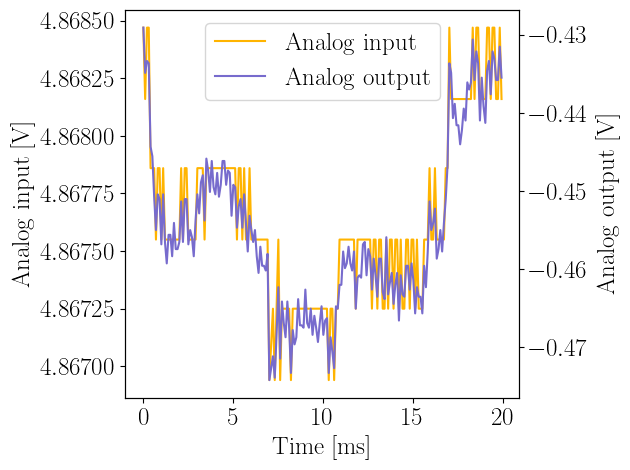

In [38]:
# plot

# setup *changed* compared to okt 14 and was adjusted to okt 18.

# plot_with_one_axis(time_okt_18_static_comp_2, AI_okt_18_static_comp_2, "name_x", "name_y", plot_title="(Oct 18th) (-41°, 5.8V (or 4.8V), 49.8Hz) okt_18_static_comp2", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5")

print(f"Delta: {max(AI_okt_18_static_comp_2)-min(AI_okt_18_static_comp_2)}")


# plot_with_one_axis([[time_okt_18_static_comp_2, AI_okt_18_static_comp_2, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="(Oct 18th) (-41°, 5.8V (or 4.8V), 49.8Hz) okt_18_static_comp2", filename_to_save="nopdf", marker_size=5)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_18_static_comp_2, AI_okt_18_static_comp_2, "Analog input", c_scheme()[0], "-", ""]], [[OTHER_time_okt_18_static_comp_2, OTHER_AI_okt_18_static_comp_2, "Analog output", c_scheme()[7], "-", ""]], name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_18_static_comp2", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)



# OTHER_time_okt_18_static_comp_2 = data_18_okt_static_comp_2.time_ms_1
# OTHER_AI_okt_18_static_comp_2 = data_18_okt_static_comp_2.analog_output

### 18 Okt okt_18_static_com_5_harmonics

(Oct 18th) How do these numbers ((5.000°, 5.100 V), (+245°, 5.1 V)) relate to "static_com_5_harmonics" and "okt_18_static_com_5_harmonics_B3_2_point_5"

In [39]:
# read data

file_okt_18_static_comp_5_har = "data/Bfielddata_Students2024/okt_18_static_com_5_harmonics.csv"
data_18_okt_static_comp_5_har = pd.read_csv(file_okt_18_static_comp_5_har, sep="\t")

time_okt_18_static_comp_5_har = data_18_okt_static_comp_5_har.analog_output / 2
AI_okt_18_static_comp_5_har = data_18_okt_static_comp_5_har.time_ms_2

OTHER_time_okt_18_static_comp_5_har = data_18_okt_static_comp_5_har.analog_output / 2
OTHER_AI_okt_18_static_comp_5_har = data_18_okt_static_comp_5_har.time_ms_1


Delta: 0.0012199999999999989


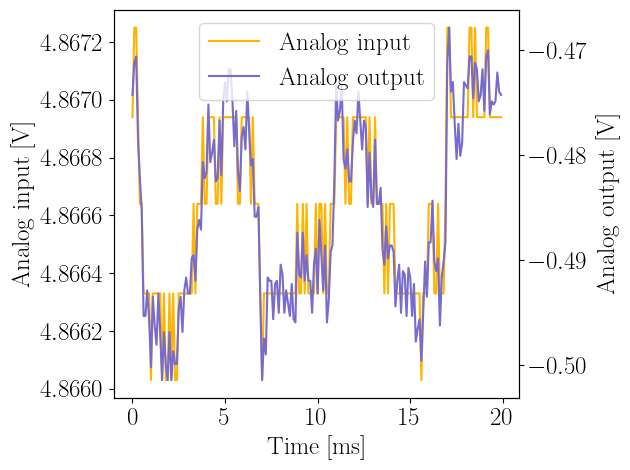

In [40]:
# plot

# plot_with_one_axis(time_okt_18_static_comp_5_har, AI_okt_18_static_comp_5_har, "name_x", "name_y", plot_title="Static comp 5 harmonics, Okt 18, 245°,5.1 V, 50 Hz", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5")

print(f"Delta: {max(AI_okt_18_static_comp_5_har)-min(AI_okt_18_static_comp_5_har)}")


# plot_with_one_axis([[time_okt_18_static_comp_5_har, AI_okt_18_static_comp_5_har, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="Static comp 5 harmonics, Okt 18, 245°,5.1 V, 50 Hz", filename_to_save="nopdf", marker_size=5)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_18_static_comp_5_har, AI_okt_18_static_comp_5_har, "Analog input", c_scheme()[0], "-", ""]], [[OTHER_time_okt_18_static_comp_5_har, OTHER_AI_okt_18_static_comp_5_har, "Analog output", c_scheme()[7], "-", ""]], name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_18_static_com_5_harmonics", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)


# OTHER_time_okt_18_static_comp_5_har = data_18_okt_static_comp_5_har.analog_output
# OTHER_AI_okt_18_static_comp_5_har = data_18_okt_static_comp_5_har.time_ms_1



### overlap of static comp2 and 5harmonics

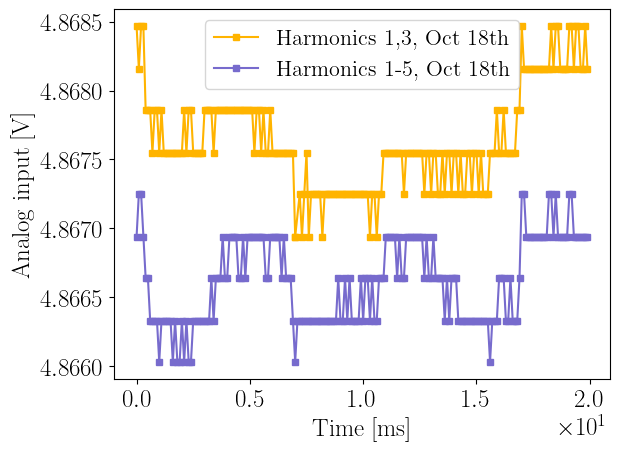

1,3: max:4.86847, min:4.86694, delta: 1.5300000000006975 mG
1-5: max:4.86725, min:4.86603, delta: 1.2199999999999989 mG


In [41]:
# overlap_staticcomp2_5harmonics_A = [
#     [time_okt_18_static_comp_2, AI_okt_18_static_comp_2, "Harmonics 1,3", c_scheme()[0], "-", ""], 
# ]

# overlap_staticcomp2_5harmonics_B = [


#     [time_okt_18_static_comp_5_har, AI_okt_18_static_comp_5_har, "Harmonics 1-5", c_scheme()[7], "-", ""],
# ]

# plot_with_two_axes_with_N_curves_with_VERTICAL_lines(overlap_staticcomp2_5harmonics_A, overlap_staticcomp2_5harmonics_B, name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog input [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/staticcom2_vs_fiveharmonics", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)

overlap_staticcomp2_5harmonics = [
    [time_okt_18_static_comp_2, AI_okt_18_static_comp_2, "Harmonics 1,3, Oct 18th", c_scheme()[0], "-", "s"], 

    [time_okt_18_static_comp_5_har, AI_okt_18_static_comp_5_har, "Harmonics 1-5, Oct 18th", c_scheme()[7], "-", "s"],
]

plot_with_one_axis(overlap_staticcomp2_5harmonics, name_x="Time [ms]", name_y="Analog input [V]", plot_title="", filename_to_save="python_figures/staticcomp2_vs_5harmonics", marker_size="5", font_size=18, legend_size=16, offset_text_size=18)

print(f"1,3: max:{max(AI_okt_18_static_comp_2)}, min:{min(AI_okt_18_static_comp_2)}, delta: {(max(AI_okt_18_static_comp_2)-min(AI_okt_18_static_comp_2))*1e3} mG")

print(f"1-5: max:{max(AI_okt_18_static_comp_5_har)}, min:{min(AI_okt_18_static_comp_5_har)}, delta: {(max(AI_okt_18_static_comp_5_har)-min(AI_okt_18_static_comp_5_har))*1e3} mG")

### 18 Okt okt_18_static_com_5_harmonics_B3_2_point_5


In [42]:
# read data

file_okt_18_static_comp_5_harmonics_B3_2_point_5 = "data/Bfielddata_Students2024/okt_18_static_comp_5_harmonics_B3_2_point_5.csv"
data_18_okt_static_comp_5_harmonics_B3_2_point_5 = pd.read_csv(file_okt_18_static_comp_5_harmonics_B3_2_point_5, sep="\t")

time_okt_18_static_comp_5_harmonics_B3_2_point_5 = data_18_okt_static_comp_5_harmonics_B3_2_point_5.analog_output
AI_okt_18_static_comp_5_harmonics_B3_2_point_5 = data_18_okt_static_comp_5_harmonics_B3_2_point_5.time_ms_2

OTHER_time_okt_18_static_comp_5_harmonics_B3_2_point_5 = data_18_okt_static_comp_5_harmonics_B3_2_point_5.analog_output
OTHER_AI_okt_18_static_comp_5_harmonics_B3_2_point_5 = data_18_okt_static_comp_5_harmonics_B3_2_point_5.time_ms_1




Delta: 0.0015300000000006975


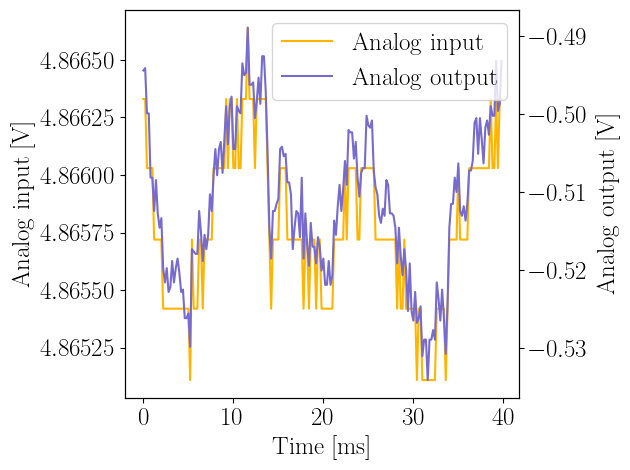

In [43]:
# plot

# plot_with_one_axis(time_okt_18_static_comp_5_harmonics_B3_2_point_5, AI_okt_18_static_comp_5_harmonics_B3_2_point_5, "name_x", "name_y", plot_title="okt_18_static_com_5_harmonics_B3_2_point_5", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5")

print(f"Delta: {max(AI_okt_18_static_comp_5_harmonics_B3_2_point_5)-min(AI_okt_18_static_comp_5_harmonics_B3_2_point_5)}")


# plot_with_one_axis([[time_okt_18_static_comp_5_harmonics_B3_2_point_5, AI_okt_18_static_comp_5_harmonics_B3_2_point_5, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="okt_18_static_com_5_harmonics_B3_2_point_5", filename_to_save="nopdf", marker_size=5)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_18_static_comp_5_harmonics_B3_2_point_5, AI_okt_18_static_comp_5_harmonics_B3_2_point_5, "Analog input", c_scheme()[0], "-", ""]], [[OTHER_time_okt_18_static_comp_5_harmonics_B3_2_point_5, OTHER_AI_okt_18_static_comp_5_harmonics_B3_2_point_5, "Analog output", c_scheme()[7], "-", ""]], name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_18_static_comp_5_harmonics_B3_2_point_5", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)




### 18 Okt static_comp_TryDetectorFit_1

In [44]:
# read data

file_okt_18_static_comp_TryDetectorFit_1 = "data/Bfielddata_Students2024/okt_18_static_comp_TryDetectorFit_1.csv"
data_18_okt_static_comp_TryDetectorFit_1 = pd.read_csv(file_okt_18_static_comp_TryDetectorFit_1, sep="\t")

time_okt_18_static_comp_TryDetectorFit_1 = data_18_okt_static_comp_TryDetectorFit_1.analog_output
AI_okt_18_static_comp_TryDetectorFit_1 = data_18_okt_static_comp_TryDetectorFit_1.time_ms_2

OTHER_time_okt_18_static_comp_TryDetectorFit_1 = data_18_okt_static_comp_TryDetectorFit_1.analog_output
OTHER_AI_okt_18_static_comp_TryDetectorFit_1 = data_18_okt_static_comp_TryDetectorFit_1.time_ms_1

Delta: 0.0012199999999999989


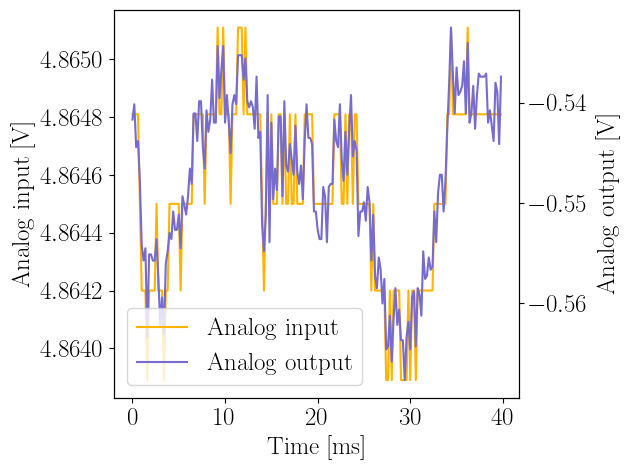

In [45]:
# plot

# plot_with_one_axis(time_okt_18_static_comp_TryDetectorFit_1, AI_okt_18_static_comp_TryDetectorFit_1, "name_x", "name_y", plot_title="okt_18_static_comp_TryDetectorFit_1", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5")

print(f"Delta: {max(AI_okt_18_static_comp_TryDetectorFit_1)-min(AI_okt_18_static_comp_TryDetectorFit_1)}")


# plot_with_one_axis([[time_okt_18_static_comp_TryDetectorFit_1, AI_okt_18_static_comp_TryDetectorFit_1, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="okt_18_static_comp_TryDetectorFit_1", filename_to_save="nopdf", marker_size=5)


plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_18_static_comp_TryDetectorFit_1, AI_okt_18_static_comp_TryDetectorFit_1, "Analog input", c_scheme()[0], "-", ""]], [[OTHER_time_okt_18_static_comp_TryDetectorFit_1, OTHER_AI_okt_18_static_comp_TryDetectorFit_1, "Analog output", c_scheme()[7], "-", ""]], name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_18_static_comp_TryDetectorFit_1", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)



### 21 okt. static comp 2 (parameters set on 18. Okt -> check differences over days)

In [46]:
# read data, we took 4.8 V and 5.8 V cause we were not sure

file_aa = "data/Bfielddata_Students2024/okt_21_static_comp_2_monday_with_V_4_p_8.csv"
file_ab = "data/Bfielddata_Students2024/okt_21_static_comp_2_monday_with_V_5_p_8.csv"

data_aa = pd.read_csv(file_aa, sep="\t")
data_ab = pd.read_csv(file_ab, sep="\t")

time_aa = data_aa.analog_output / 2
AI_aa = data_aa.time_ms_2
OTHER_time_aa = data_aa.analog_output
OTHER_AI_aa = data_aa.time_ms_1

time_ab = data_ab.analog_output / 2
AI_ab = data_ab.time_ms_2
OTHER_time_ab = data_ab.analog_output
OTHER_AI_ab = data_ab.time_ms_1

compare_file_aa = "data/Bfielddata_Students2024/okt_18_static_comp2.csv"
compare_data_aa = pd.read_csv(compare_file_aa, sep="\t")

compare_time_aa = compare_data_aa.time_ms_1 / 2
compare_AI_aa = compare_data_aa.analog_input
OTHER_compare_time_aa = compare_data_aa.time_ms_1
OTHER_compare_AI_aa = compare_data_aa.analog_output



oct 18th: max:4.86847, min:4.86694, delta: 1.5300000000006975 mG
static comp 4.8: max:4.86755, min:4.86511, delta: 2.4399999999999977 mG
static comp 5.8: max:4.86755, min:4.86481, delta: 2.7399999999992986 mG
comp4.8/5.8: 2.589999999999648 +- -0.2999999999993008 mG
1.5300000000006975 2.589999999999648
decrease of 69.28104575153382


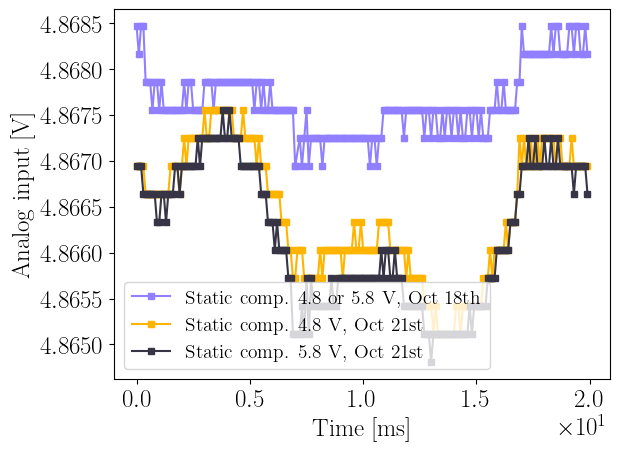

In [47]:
# plot

eins = [
    
[OTHER_compare_time_aa, OTHER_compare_AI_aa, "lab", c_scheme()[8], "-", ""],
[OTHER_time_aa, OTHER_AI_aa, "lab", c_scheme()[0], "-", ""],
[OTHER_time_ab, OTHER_AI_ab, "lab", c_scheme()[4], "-", ""]
]

zwei = [
[compare_time_aa, compare_AI_aa, "Static comp. 4.8 or 5.8 V, Oct 18th", c_scheme()[8], "-", "s"],
[time_aa, AI_aa, "Static comp. 4.8 V, Oct 21st", c_scheme()[0], "-", "s"],
[time_ab, AI_ab, "Static comp. 5.8 V, Oct 21st", c_scheme()[4], "-", "s"],
]

print(f"oct 18th: max:{max(compare_AI_aa)}, min:{min(compare_AI_aa)}, delta: {(max(compare_AI_aa)-min(compare_AI_aa))*1e3} mG")

print(f"static comp 4.8: max:{max(AI_aa)}, min:{min(AI_aa)}, delta: {(max(AI_aa)-min(AI_aa))*1e3} mG")

print(f"static comp 5.8: max:{max(AI_ab)}, min:{min(AI_ab)}, delta: {(max(AI_ab)-min(AI_ab))*1e3} mG")

print(f"comp4.8/5.8: {((max(AI_ab)-min(AI_ab))*1e3 + (max(AI_aa)-min(AI_aa))*1e3)/2} +- {(max(AI_aa)-min(AI_aa))*1e3 - (max(AI_ab)-min(AI_ab))*1e3} mG")

# Given measurements
initial_measurement = (max(compare_AI_aa)-min(compare_AI_aa))*1e3
second_measurement = ((max(AI_ab)-min(AI_ab))*1e3 + (max(AI_aa)-min(AI_aa))*1e3)/2

# Calculate percentage increase
percentage_increase = ((second_measurement - initial_measurement) / initial_measurement) * 100
percentage_increase

print(initial_measurement, second_measurement)
print(f"decrease of {percentage_increase}")

plot_with_one_axis(zwei, name_x="Time [ms]", name_y="Analog input [V]", plot_title="", filename_to_save="python_figures/static_comp_oct18_vs_oct21_AI", marker_size="5", font_size=18, offset_text_size=18, legend_local=3, legend_size=14, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]

In [48]:
# # Initial and new measurement values
# initial_value = 1.5
# new_measurements = [2.6]

# # Calculate percentage improvements
# improvements = [(initial_value - new_value) / initial_value * 100 for new_value in new_measurements]
# improvements


import numpy as np

# Initial values and uncertainties
initial_value = 1.5  # initial measurement value in kHz
initial_uncertainty = 0.3 # uncertainty in initial measurement in kHz

# New measurements and their uncertainties
new_measurements = [2.6]  # new measurement values in kHz
new_uncertainties = [0.3]  # uncertainties for new measurements in kHz

# Calculate improvements and their propagated uncertainties
improvement_percentages = []
uncertainties_in_improvement = []

for new_value, new_uncertainty in zip(new_measurements, new_uncertainties):
    # Calculate improvement percentage
    improvement = (initial_value - new_value) / initial_value * 100
    improvement_percentages.append(improvement)
    
    # Calculate propagated uncertainty in the improvement percentage
    uncertainty = improvement * np.sqrt((initial_uncertainty / initial_value) ** 2 +
                                        (new_uncertainty / new_value) ** 2)
    uncertainties_in_improvement.append(uncertainty)

improvement_percentages, uncertainties_in_improvement



([-73.33333333333334], [-16.932476022342563])

### 21. Okt static comp 3 (parameters optimized from Okt 18th)

In [49]:
# read data

# DATA IS MISSING =(

Delta: 0.0012199999999999989
1-5: max:4.86725, min:4.86603, delta: 1.2199999999999989 mG


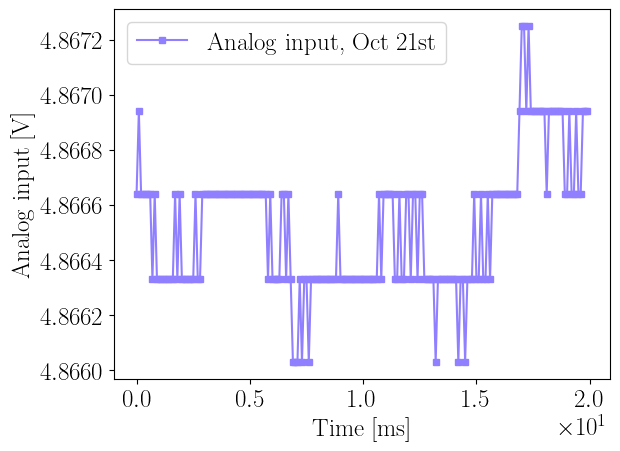

In [50]:
# plot

# plot_with_one_axis(time_okt_21_static_comp_monday_optimized_the_setup, AI_okt_21_static_comp_monday_optimized_the_setup, "name_x", "name_y", plot_title="okt_21_static_comp_monday_optimized_the_setup", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5")

print(f"Delta: {max(AI_okt_21_static_comp_monday_optimized_the_setup)-min(AI_okt_21_static_comp_monday_optimized_the_setup)}")


# plot_with_one_axis([[time_okt_21_static_comp_monday_optimized_the_setup, AI_okt_21_static_comp_monday_optimized_the_setup, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="okt_21_static_comp_monday_optimized_the_setup", filename_to_save="nopdf", marker_size=5)


# OTHER_time_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.analog_output
# OTHER_AI_okt_21_static_comp_monday_optimized_the_setup = data_okt_21_static_comp_monday_optimized_the_setup.time_ms_1

print(f"1-5: max:{max(AI_okt_21_static_comp_monday_optimized_the_setup)}, min:{min(AI_okt_21_static_comp_monday_optimized_the_setup)}, delta: {(max(AI_okt_21_static_comp_monday_optimized_the_setup)-min(AI_okt_21_static_comp_monday_optimized_the_setup))*1e3} mG")

# plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[time_okt_21_static_comp_monday_optimized_the_setup, AI_okt_21_static_comp_monday_optimized_the_setup, "Analog input", c_scheme()[0], "-", "s"]], [[OTHER_time_okt_21_static_comp_monday_optimized_the_setup, OTHER_AI_okt_21_static_comp_monday_optimized_the_setup, "Analog output", c_scheme()[7], "-", ""]], name_x="Time [ms]", name_y1="Analog input [V]", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_21_static_comp_monday_optimized_the_setup", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)

plot_with_one_axis([[time_okt_21_static_comp_monday_optimized_the_setup, AI_okt_21_static_comp_monday_optimized_the_setup, "Analog input, Oct 21st", c_scheme()[8], "-", "s"]], name_x="Time [ms]", name_y="Analog input [V]", plot_title="", filename_to_save="python_figures/okt_21_static_comp_monday_optimized_the_setup", marker_size="5", font_size=18, offset_text_size=18, legend_local="best", legend_size=18, x_ticks_limit=5) # [data_x, data_y, label, colorr, line_style, marker_type]




In [51]:
# fit oct21s YES comp

# get a good initial guess for "21st comp"
def fitfunc21(t, A, B1, B3, phi1, phi3, scale):
    B = [B1, B3]
    phi = [phi1, phi3]
    y = A
  

    for i in range(1, 3):
        # print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
        # y += B[i - 1] * np.cos(scale * (2*np.pi)*50*i*(t) + phi[i - 1])
        y += B[i - 1] * np.cos(scale *(2*np.pi)*i*(t) + phi[i - 1])

    return y

ss = 60
B = np.array([0.1, 0.7]) / (ss)
phi = np.array([0, -0.5*np.pi])
phi = phi
A = -0.38
scale = 1/(15)
initial_guess = [A, *B, *phi, scale]
# print(initial_guess)
fitted_x_YC = np.linspace(min(OTHER_time_okt_21_static_comp_monday_optimized_the_setup),max(OTHER_time_okt_21_static_comp_monday_optimized_the_setup),10000)
y_guess_COMP21 = fitfunc21(fitted_x_YC, A, *B, *phi, scale)
boundaries=([-1,0,0,10*-np.pi,10*-np.pi,1e-12],[10,10,10, 2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc21, OTHER_time_okt_21_static_comp_monday_optimized_the_setup, OTHER_AI_okt_21_static_comp_monday_optimized_the_setup, p0=initial_guess) #, bounds=boundaries)
fitted_y_YC_COMP21 = fitfunc21(fitted_x_YC, *params)

print(params)
fitted_x_YC
fitted_y_YC_COMP21

[-3.84243051e-01  3.87998332e-03  5.06143162e-03 -1.78296558e+00
 -4.11160888e+00  7.39757727e-02]


array([-0.38792126, -0.38792547, -0.38792967, ..., -0.38400681,
       -0.38401921, -0.38403161])

In [52]:
testtt =  [-3.84243051e-01,  3.87998332e-03,  5.06143162e-03, -1.78296558e+00, -4.11160888e+00, 7.39757727e-02]


test_y = fitfunc21(fitted_x_YC, *testtt)
fitted_x_YC

array([0.00000000e+00, 1.99019902e-03, 3.98039804e-03, ...,
       1.98960196e+01, 1.98980098e+01, 1.99000000e+01])

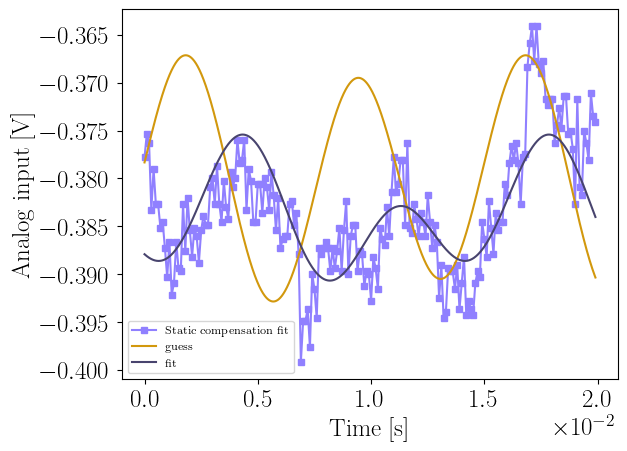

In [53]:
fit_to_21st = [
    [OTHER_time_okt_21_static_comp_monday_optimized_the_setup*1e-3, OTHER_AI_okt_21_static_comp_monday_optimized_the_setup, "Static compensation fit", c_scheme()[8],  "-", "s"],
  
    [fitted_x_YC*1e-3, y_guess_COMP21, "guess", c_scheme()[1],  "-", ""],

    [fitted_x_YC*1e-3, fitted_y_YC_COMP21, "fit", c_scheme()[5],  "-", ""],

    # [fitted_x_YC, test_y, "test", c_scheme()[2],  "-", ""],
]

plot_with_one_axis(fit_to_21st, name_x="Time [s]", name_y="Analog input [V]", plot_title="", filename_to_save="nosvg", marker_size="4", font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5, legend_size=10*(5/6))


In [54]:
setitx = OTHER_time_okt_21_static_comp_monday_optimized_the_setup*1e-3
setity = OTHER_AI_okt_21_static_comp_monday_optimized_the_setup


In [55]:
# fit oct21s YES comp

# get a good initial guess for "21st comp"
def fitfunc21(t, A, B1, B3, phi1, phi3, scale):
    B = [B1, B3]
    phi = [phi1, phi3]
    y = A
  

    for i in range(1, 3):
        # print(f"B: {B[i - 1]}, phi: {phi[i - 1]}")
        # y += B[i - 1] * np.cos(scale * (2*np.pi)*50*i*(t) + phi[i - 1])
        y += B[i - 1] * np.cos(scale *(2*np.pi)*i*(t) + phi[i - 1])

    return y

ss = 60
B = np.array([0.1, 0.7]) / (ss)
phi = np.array([0, -0.5*np.pi])
phi = phi
A = -0.38
scale = 80
initial_guess = [A, *B, *phi, scale]
# print(initial_guess)
x_fit_setit = np.linspace(min(setitx),max(setitx),10000)

y_guess_setit = fitfunc21(x_fit_setit, A, *B, *phi, scale)
boundaries=([-1,0,0,10*-np.pi,10*-np.pi,1e-12],[10,10,10, 2*np.pi,np.pi, 1e12])
params, covariance = curve_fit(fitfunc21, setitx, setity, p0=initial_guess) #, bounds=boundaries)

setit_fit_y = fitfunc21(x_fit_setit, *params)
params


array([-3.84242963e-01,  3.87989661e-03, -5.06153943e-03, -1.78309919e+00,
       -9.70292655e-01,  7.39774427e+01])

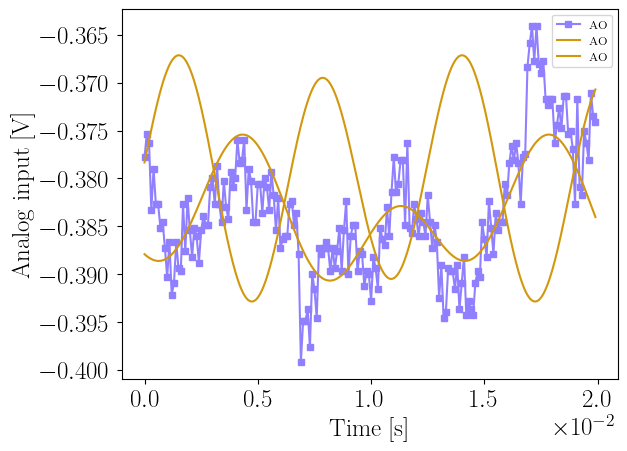

In [56]:
fit_to_21st = [
    [setitx, setity, "AO", c_scheme()[8],  "-", "s"],

    [x_fit_setit, y_guess_setit, "AO", c_scheme()[1],  "-", ""],

    [x_fit_setit, setit_fit_y, "AO", c_scheme()[1],  "-", ""],

]

plot_with_one_axis(fit_to_21st, name_x="Time [s]", name_y="Analog input [V]", plot_title="", filename_to_save="nosvg", marker_size="4", font_size=18, offset_text_size=18, legend_local = 0, x_ticks_limit=5, legend_size=10*(5/6))

### Okt 21 okt_21_long_term_fluctuations_RabiFlop

In [57]:
# read data

question = "data/Bfielddata_Students2024/okt_21_long_term_fluctuations_RabiFlop.csv"

what = pd.read_csv(question, sep="\t")

a = what.analog_output
b = what.time_ms_1

OTHER_a = what.analog_output
OTHER_b = what.time_ms_2

Delta: 0.051574999999999926


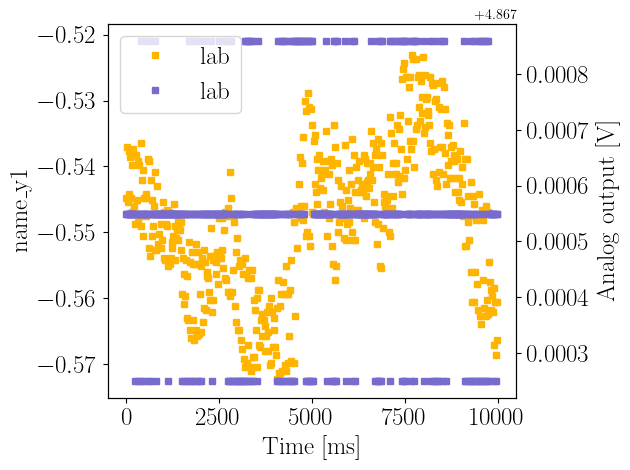

In [58]:
# plot

# plot_with_one_axis(a, b, "name_x", "name_y", plot_title="title", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="dimgray", marker_type="", marker_size="5")

print(f"Delta: {max(b)-min(b)}")

# plot_with_one_axis([[a, b, "lab", c_scheme()[0], "-", ""]], "name_x", "name_y", plot_title="title", filename_to_save="nosvg", marker_size=5)


plot_with_two_axes_with_N_curves_with_VERTICAL_lines([[a, b, "lab", c_scheme()[0], "", "s"]], [[OTHER_a, OTHER_b, "lab", c_scheme()[7], "", "s"]], name_x="Time [ms]", name_y1="name_y1", name_y2="Analog output [V]", col_ax1 = "black", col_ax2= "black", plot_title="", filename_to_save="python_figures/okt_21_long_term_fluctuations_RabiFlop", marker_size="5", font_size=18, legend_size=18, vlines=None, x_ticks=True)




